<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_VOLUME_FRACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import statistics
import ast
from scipy.stats import spearmanr

In [ ]:
file_name = 'NEW_KEY_DATA_2.txt'

In [ ]:
loc = 'final_graphs_v5'
path = f'/content/drive/MyDrive/A_132/{loc}'
%cd $path

/content/drive/MyDrive/A_132/final_graphs_v5


In [ ]:
temps = ['50.0', '50_b', '50_c']
dil_vol_frac_OG_single_value = {}
den_vol_frac_OG_single_value = {}

for i in temps:
  path = f'/content/drive/MyDrive/A_132/{i}/{file_name}'
  with open(path, 'r') as file:
    for line in file:
        if 'Dense Phase concentration (log function)' in line:
            den_vol = float(line.split(':')[-1].strip())
            den_vol_frac_OG_single_value[i] = den_vol
        if 'Dilute Phase concentration (log function)' in line:
            dil_vol = float(line.split(':')[-1].strip())
            dil_vol_frac_OG_single_value[i] = dil_vol
            break

print(dil_vol_frac_OG_single_value)
print(den_vol_frac_OG_single_value)

{'50.0': 0.0002279041503402674, '50_b': 0.0003510252111705691, '50_c': -0.00034590104339667896}
{'50.0': 0.5511831430444251, '50_b': 0.5599113634467493, '50_c': 0.5582427528951998}


In [ ]:
temps = ['50.0', '50_b', '50_c']
dil_vol_frac_OG = {}
den_vol_frac_OG = {}
dil_vol_frac_OG_av = {}
den_vol_frac_OG_std = {}
den_vol_frac_OG_av = {}
dil_vol_frac_OG_std = {}

for i in temps:
  path = f'/content/drive/MyDrive/A_132/{i}/{file_name}'
  with open(path, 'r') as file:
    for line in file:
        if 'Dense Phase concentration (linear)' in line:
            den_vol = line.split(':')[-1]
            den_vol_frac_OG[i] = den_vol
        if 'Dilute Phase concentration (mass balance)' in line:
            dil_vol = line.split(':')[-1]
            dil_vol_frac_OG[i] = dil_vol
            break

print(dil_vol_frac_OG)
print(den_vol_frac_OG)
for i in temps:
  list_string_den = den_vol_frac_OG[i]
  list_string_dil = dil_vol_frac_OG[i]


  try:
      den_list = ast.literal_eval(list_string_den.strip())
      dil_list = ast.literal_eval(list_string_dil.strip())
      den_vol_frac_OG[i] = den_list
      dil_vol_frac_OG[i] = dil_list
  except (SyntaxError, ValueError) as e:
      print(f"Error evaluating the string as a list: {e}")
print(dil_vol_frac_OG)
print(den_vol_frac_OG)

for i in temps:
  dil_vol_value = dil_vol_frac_OG[i]
  den_vol_value = den_vol_frac_OG[i]
  den_vol_frac_OG_av[i] = sum(den_vol_value) / len(den_vol_value)
  dil_vol_frac_OG_av[i] = sum(dil_vol_value) / len(dil_vol_value)
  den_vol_frac_OG_std[i] = np.std(den_vol_value)
  dil_vol_frac_OG_std[i] = np.std(dil_vol_value)
print(den_vol_frac_OG_av)
print(dil_vol_frac_OG_av)
print(den_vol_frac_OG_std)
print(dil_vol_frac_OG_std)

list_den = []
list_dil = []
for i in temps:
  dil_vol_value = dil_vol_frac_OG_av[i]
  den_vol_value = den_vol_frac_OG_av[i]
  list_den.append(den_vol_value)
  list_dil.append(dil_vol_value)
den_vol_frac_OG_av_2 = sum(list_den) / len(list_den)
dil_vol_frac_OG_av_2 = sum(list_dil) / len(list_dil)
den_vol_frac_OG_std_2 = np.std(list_den)
dil_vol_frac_OG_std_2 = np.std(list_dil)

print(den_vol_frac_OG_std_2)
print(dil_vol_frac_OG_std_2)
print(den_vol_frac_OG_av_2)
print(dil_vol_frac_OG_av_2)

{'50.0': ' [0.00032134116860676754, 0.00026673827472241445, 0.0001951896551498139, 0.0002818011420008567, 0.000364646912032289]\n', '50_b': ' [0.00031470199886974486, 0.00042771997862256993, 0.0003028382330393378, 0.000338429530530559, 0.00032344372106057114]\n', '50_c': ' [0.00023751668605138753, 0.0003659887721741697, 0.0003070796204886013, 0.00035408160321644843, 0.00019302147573569222]\n'}
{'50.0': ' [0.5317142114858685, 0.5411766674666958, 0.5480630824202254, 0.5478453288659481, 0.5380027105759486]\n', '50_b': ' [0.5467527061616162, 0.557558584777898, 0.5703357098672709, 0.5669269460014114, 0.5433946726400899]\n', '50_c': ' [0.5581380858129666, 0.556661316891066, 0.5589904702426091, 0.5520725996094716, 0.5327575798982588]\n'}
{'50.0': [0.00032134116860676754, 0.00026673827472241445, 0.0001951896551498139, 0.0002818011420008567, 0.000364646912032289], '50_b': [0.00031470199886974486, 0.00042771997862256993, 0.0003028382330393378, 0.000338429530530559, 0.00032344372106057114], '50_c

In [ ]:
temps = ['50.0', '50_b', '50_c']
dil_vol_frac_66_single_value = {}
den_vol_frac_66_single_value = {}

for i in temps:
  path = f'/content/drive/MyDrive/CHUNK_66_132/{i}/{file_name}'
  with open(path, 'r') as file:
    for line in file:
        if 'Dense Phase concentration (log function)' in line:
            den_vol = float(line.split(':')[-1].strip())
            den_vol_frac_66_single_value[i] = den_vol
        if 'Dilute Phase concentration (log function):' in line:
            dil_vol = float(line.split(':')[-1].strip())
            dil_vol_frac_66_single_value[i] = dil_vol
            break

print(dil_vol_frac_66_single_value)
print(den_vol_frac_66_single_value)

{'50.0': -0.0012718564434544585, '50_b': -0.0007903525475693152, '50_c': 0.00042818699871646467}
{'50.0': 0.5460606011196667, '50_b': 0.5654303066246853, '50_c': 0.5421093294365932}


In [ ]:
temps = ['50.0', '50_b', '50_c']
dil_vol_frac_66 = {}
den_vol_frac_66 = {}
dil_vol_frac_66_av = {}
den_vol_frac_66_std = {}
den_vol_frac_66_av = {}
dil_vol_frac_66_std = {}

for i in temps:
  path = f'/content/drive/MyDrive/CHUNK_66_132/{i}/{file_name}'
  with open(path, 'r') as file:
    for line in file:
        if 'Dense Phase concentration (linear)' in line:
            den_vol = line.split(':')[-1]
            den_vol_frac_66[i] = den_vol
        if 'Dilute Phase concentration (mass balance)' in line:
            dil_vol = line.split(':')[-1]
            dil_vol_frac_66[i] = dil_vol
            break

print(den_vol_frac_66)
for i in temps:
  list_string_dil = dil_vol_frac_66[i]
  list_string_den = den_vol_frac_66[i]

  # Use ast.literal_eval to safely evaluate the string as a list
  try:
      den_list = ast.literal_eval(list_string_den.strip())
      dil_list = ast.literal_eval(list_string_dil.strip())
      den_vol_frac_66[i] = den_list
      dil_vol_frac_66[i] = dil_list
  except (SyntaxError, ValueError) as e:
      print(f"Error evaluating the string as a list: {e}")
print(den_vol_frac_66)

for i in temps:
  dil_vol_value = dil_vol_frac_66[i]
  den_vol_value = den_vol_frac_66[i]
  print(den_vol_value)
  den_vol_frac_66_av[i] = sum(den_vol_value) / len(den_vol_value)
  dil_vol_frac_66_av[i] = sum(dil_vol_value) / len(dil_vol_value)
  den_vol_frac_66_std[i] = np.std(den_vol_value)
  dil_vol_frac_66_std[i] = np.std(dil_vol_value)
print(den_vol_frac_66_av)
#print(dil_vol_frac_66_av)
#print(den_vol_frac_66_std)
#print(dil_vol_frac_66_std)

list_den = []
list_dil = []
for i in temps:
  dil_vol_value = dil_vol_frac_66_av[i]
  den_vol_value = den_vol_frac_66_av[i]
  list_den.append(den_vol_value)
  list_dil.append(dil_vol_value)
print(list_den)
den_vol_frac_66_av_2 = sum(list_den) / len(list_den)
dil_vol_frac_66_av_2 = sum(list_dil) / len(list_dil)
den_vol_frac_66_std_2 = np.std(list_den)
dil_vol_frac_66_std_2 = np.std(list_dil)

print(den_vol_frac_66_std_2)
print(dil_vol_frac_66_std_2)
print(den_vol_frac_66_av_2)
print(dil_vol_frac_66_av_2)


{'50.0': ' [0.5225025554361636, 0.5223428121739373, 0.5403169314363068, 0.5535507156083124, 0.5571681474244077]\n', '50_b': ' [0.5565274833640245, 0.5570269479660138, 0.5728803811985954, 0.5572440996348499, 0.5501340269174764]\n', '50_c': ' [0.5287877298257114, 0.5436716689185122, 0.5418494607451567, 0.5331190121057235, 0.559917115871216]\n'}
{'50.0': [0.5225025554361636, 0.5223428121739373, 0.5403169314363068, 0.5535507156083124, 0.5571681474244077], '50_b': [0.5565274833640245, 0.5570269479660138, 0.5728803811985954, 0.5572440996348499, 0.5501340269174764], '50_c': [0.5287877298257114, 0.5436716689185122, 0.5418494607451567, 0.5331190121057235, 0.559917115871216]}
[0.5225025554361636, 0.5223428121739373, 0.5403169314363068, 0.5535507156083124, 0.5571681474244077]
[0.5565274833640245, 0.5570269479660138, 0.5728803811985954, 0.5572440996348499, 0.5501340269174764]
[0.5287877298257114, 0.5436716689185122, 0.5418494607451567, 0.5331190121057235, 0.559917115871216]
{'50.0': 0.539176232415

In [ ]:
den_averages_66 = {}
dil_averages_66 = {}
den_std_dev_66 = {}
dil_std_dev_66 = {}

den_vol_frac_66_single_value

for i in temps:
  dil_vol_value = dil_vol_frac_66_single_value[i]
  den_vol_value = den_vol_frac_66_single_value[i]

  list_den.append(den_vol_value)
  list_dil.append(dil_vol_value)
den_averages_66 = np.mean(list_den)
dil_averages_66 = np.mean(list_dil)
den_std_dev_66_z = np.std(list_den)
dil_std_dev_66_z = np.std(list_dil)

In [ ]:
for i in temps:
  dil_vol_value = dil_vol_frac_OG_single_value[i]
  den_vol_value = den_vol_frac_OG_single_value[i]

  list_den.append(den_vol_value)
  list_dil.append(dil_vol_value)
den_averages_OG = np.mean(list_den)
dil_averages_OG = np.mean(list_dil)
den_std_dev_OG_z = np.std(list_den)
dil_std_dev_OG_z = np.std(list_dil)

In [ ]:
dil_vol_frac_single_value = {}
den_vol_frac_single_value = {}

chunks = ['1', '2', '11', '33']
temps = ['50.0', '50_b', '50_c']
shuff = ['reshuffle_1','reshuffle_2', 'reshuffle_3', 'reshuffle_4','reshuffle_5', 'reshuffle_6']

for k in chunks:
  dil_vol_frac_single_value[k] = {}
  den_vol_frac_single_value[k] = {}
  for j in shuff:
    dil_vol_frac_single_value[k][j] = {}
    den_vol_frac_single_value[k][j] = {}
    for i in temps:
      path = f'/content/drive/MyDrive/CHUNK_{k}_132/{j}/{i}/{file_name}'
      try:
        with open(path, 'r') as file:
          for line in file:
              if 'Dense Phase concentration (log function)' in line:
                  den_vol = float(line.split(':')[-1].strip())
                  den_vol_frac_single_value[k][j][i] = den_vol
              if 'Dilute Phase concentration (log function)' in line:
                  dil_vol = float(line.split(':')[-1].strip())
                  dil_vol_frac_single_value[k][j][i] = dil_vol
                  break

      except FileNotFoundError:
        print(f"The file at path {path} does not exist. Ignoring.")

print(dil_vol_frac_single_value)
print(den_vol_frac_single_value)

{'1': {'reshuffle_1': {'50.0': 0.5626766462907873, '50_b': 0.5445297387235193, '50_c': 0.5614917961122652}, 'reshuffle_2': {'50.0': 0.5605645245703599, '50_b': 0.5611698280099227, '50_c': 0.5433928611131152}, 'reshuffle_3': {'50.0': 0.5499705629285141, '50_b': 0.5491181647789225, '50_c': 0.5665655020229317}, 'reshuffle_4': {'50.0': 0.5584723928752939, '50_b': 0.5507218219117908, '50_c': 0.5578340866121292}, 'reshuffle_5': {'50.0': 0.552575834145822, '50_b': 0.5414328814613621, '50_c': 0.5474540257994372}, 'reshuffle_6': {'50.0': 0.5549818966326316, '50_b': 0.5492603502933884, '50_c': 0.5521704466363475}}, '2': {'reshuffle_1': {'50.0': 0.5594998767558571, '50_b': 0.5611725651373777, '50_c': 0.5611725651373777}, 'reshuffle_2': {'50.0': 0.5580256065647823, '50_b': 0.5383034492862245, '50_c': 0.5569384978831909}, 'reshuffle_3': {'50.0': 0.5510344307635963, '50_b': 0.5672214636131577, '50_c': 0.5502123314580197}, 'reshuffle_4': {'50.0': 0.5449133355014836, '50_b': 0.5625248626640372, '50_c'

In [ ]:
dil_vol_frac = {}
den_vol_frac = {}
chunks = ['1', '2', '11', '33']
temps = ['50.0', '50_b', '50_c']597, '50_b': 0.5523806102762047, '50_c': 0.5523520925500457}}, '11': {'reshuffle_1': {'50.0': 0.5664288744407586, '50_b': 0.5549564664291271, '50_c': 0.5439972663446513}, 'reshuffle_2': {'50.0': 0.5580123575433661, '50_b': 0.5454831631300306, '50_c': 0.5692123389028182}, 'reshuffle_3': {'50.0': 0.5536802840013425, '50_b': 0.5514984982894805, '50_c': 0.5615093669250623}, 'reshuffle_4': {'50.0': 0.5494665251801648, '50_b': 0.5410804394448364, '50_c': 0.5525388372095281}, 'reshuffle_5': {'50.0': 0.5525645437938828, '50_b': 0.5477733197903445, '50_c': 0.5654890091061455}, 'reshuffle_6': {'50.0': 0.5673462580786753, '50_b': 0.5589579211057197, '50_c': 0.5535022036479836}}, '33': {'reshuffle_1': {'50.0': 0.5470074133510278, '50_b': 0.5506668265816091, '50_c': 0.5600139211410526}, 'reshuffle_2': {'50.0': 0.5474080292439126, '50_b': 0.5399684862863818, '50_c': 0.5468551615570282}, 'reshuffle_3': {'50.0': 0.5460606011196667, '50_b': 0.5654303066246853, '50_c': 0.5421093294365932}, 'reshuffle_4': {'50.0': 0.5440351754186559, '50_b': 0.5485918892308774, '50_c': 0.5686351617523618}, 'reshuffle_5': {'50.0': 0.5610348510432499, '50_b': 0.5364201044389383, '50_c': 0.548728116971898}, 'reshuffle_6': {'50.0': 0.5542302307098251, '50_b': 0.5506359981748586, '50_c': 0.5484913089363612}}}

shuff = ['reshuffle_1','reshuffle_2', 'reshuffle_3', 'reshuffle_4','reshuffle_5', 'reshuffle_6']

for k in chunks:
  dil_vol_frac[k] = {}
  den_vol_frac[k] = {}
  for j in shuff:
    dil_vol_frac[k][j] = {}
    den_vol_frac[k][j] = {}
    for i in temps:
      path = f'/content/drive/MyDrive/CHUNK_{k}_132/{j}/{i}/{file_name}'
      with open(path, 'r') as file:
        for line in file:
            if 'Dense Phase concentration (linear)' in line:
                den_vol = line.split(':')[-1]
                den_vol_frac[k][j][i] = den_vol
            if 'Dilute Phase concentration (mass balance)' in line:
                dil_vol = line.split(':')[-1]
                dil_vol_frac[k][j][i] = dil_vol
                break

print(dil_vol_frac)
print(den_vol_frac)

for k in chunks:
  dil_vol_frac_k = dil_vol_frac[k]
  den_vol_frac_k = den_vol_frac[k]
  for j in shuff:
    dil_vol_frac_k_j = dil_vol_frac[k][j]
    den_vol_frac_k_j = den_vol_frac[k][j]
    for i in temps:
      list_string_den = den_vol_frac[k][j][i]
      list_string_dil = dil_vol_frac[k][j][i]

      # Use ast.literal_eval to safely evaluate the string as a list
      try:
          den_list = ast.literal_eval(list_string_den.strip())
          dil_list = ast.literal_eval(list_string_dil.strip())
          den_vol_frac[k][j][i] = den_list
          dil_vol_frac[k][j][i] = dil_list
      except (SyntaxError, ValueError) as e:
          print(f"Error evaluating the string as a list: {e}")
print(dil_vol_frac)
print(den_vol_frac)

{'1': {'reshuffle_1': {'50.0': ' [0.00015147153684603597, 0.00016649350744233704, 0.0003361165920922368, 0.00030607265089963465, 0.00039995996712651643]\n', '50_b': ' [0.00024681142581903595, 0.00018650737467433448, 0.0005862548477263247, 0.0005066783678652753, 0.000420263284266167]\n', '50_c': ' [0.00012486794257008846, 0.0001841802152908805, 0.00016170398562826454, 0.00014859285165840527, 0.0001960426698350389]\n'}, 'reshuffle_2': {'50.0': ' [0.0005177382008339092, 0.00014765591892714643, 0.00022493965521667414, 0.0002676656232466569, 0.0004159498652330678]\n', '50_b': ' [0.00026418865520619496, 0.0003116551748177099, 0.00018611872163462435, 0.00032477092365773374, 0.00040471453563502204]\n', '50_c': ' [0.0003216535883888741, 0.000300459359696584, 0.00014898296051345139, 0.0003241470270585553, 0.00021692916426226393]\n'}, 'reshuffle_3': {'50.0': ' [0.0004131648113360756, 0.0002817032804564152, 0.0002842073096160278, 0.0002441428430622265, 0.00034242598757702026]\n', '50_b': ' [0.0002

In [ ]:
den_averages = {}
dil_averages = {}
den_std_dev = {}
dil_std_dev = {}
for k in chunks:
  den_averages[k] = {}
  dil_averages[k] = {}
  den_std_dev[k] = {}
  dil_std_dev[k] = {}
  for j in shuff:
    list_den = []
    list_dil = []

    for i in temps:
      dil_vol_value = dil_vol_frac_single_value[k][j][i]
      den_vol_value = den_vol_frac_single_value[k][j][i]

      list_den.append(den_vol_value)
      list_dil.append(dil_vol_value)
    den_averages[k][j] = np.mean(list_den)
    dil_averages[k][j] = np.mean(list_dil)
    den_std_dev[k][j] = np.std(list_den)
    dil_std_dev[k][j] = np.std(list_dil)

In [ ]:
den_averages_lin = {}
dil_averages_lin = {}
den_std_dev_lin = {}
dil_std_dev_lin = {}
den_averages_lin_2 = {}
dil_averages_lin_2 = {}
den_std_dev_lin_2 = {}
dil_std_dev_lin_2 = {}

chunks = ['1', '2', '11', '33']
temps = ['50.0', '50_b', '50_c']
shuff = ['reshuffle_1','reshuffle_2', 'reshuffle_3', 'reshuffle_4','reshuffle_5', 'reshuffle_6']
for k in chunks:
  dil_vol_k = dil_vol_frac[k]
  den_vol_k = den_vol_frac[k]
  dil_averages_lin[k] = {}
  den_averages_lin[k] = {}
  den_std_dev_lin[k] = {}
  dil_std_dev_lin[k] = {}
  for j in shuff:
    dil_vol_k_j = dil_vol_frac[k][j]
    den_vol_k_j = den_vol_frac[k][j]
    dil_averages_lin[k][j] = {}
    den_averages_lin[k][j] = {}
    den_std_dev_lin[k][j] = {}
    dil_std_dev_lin[k][j] = {}
    for i in temps:
      dil_vol_values = dil_vol_k_j[i]
      den_vol_values = den_vol_k_j[i]
      dil_averages_lin[k][j][i] = np.mean(dil_vol_values)
      den_averages_lin[k][j][i]  = np.mean(den_vol_values)
      dil_std_dev_lin[k][j][i]  = np.std(dil_vol_values)
      den_std_dev_lin[k][j][i]  = np.std(den_vol_values)
print(den_averages_lin)
print(dil_averages_lin)

for k in chunks:
  dil_vol_k = dil_averages_lin[k]
  den_vol_k = den_averages_lin[k]
  den_averages_lin_2[k] = {}
  dil_averages_lin_2[k] = {}
  den_std_dev_lin_2[k] = {}
  dil_std_dev_lin_2[k] = {}
  for j in shuff:
    dil_vol_k_j = dil_averages_lin[k][j]
    den_vol_k_j = den_averages_lin[k][j]
    list_den = []
    list_dil = []

    for i in temps:
      dil_vol_value = dil_averages_lin[k][j][i]
      den_vol_value = den_averages_lin[k][j][i]

      list_den.append(den_vol_value)
      list_dil.append(dil_vol_value)
    den_averages_lin_2[k][j] = sum(list_den) / len(list_den)
    dil_averages_lin_2[k][j] = sum(list_dil) / len(list_dil)
    den_std_dev_lin_2[k][j] = np.std(list_den)
    dil_std_dev_lin_2[k][j] = np.std(list_dil)
print(den_averages_lin_2)
print(dil_averages_lin_2)

{'1': {'reshuffle_1': {'50.0': 0.5560178956221375, '50_b': 0.5522160661696942, '50_c': 0.5635655562520197}, 'reshuffle_2': {'50.0': 0.5542714934870457, '50_b': 0.5503631675710778, '50_c': 0.5459096996803726}, 'reshuffle_3': {'50.0': 0.5468108396968765, '50_b': 0.5521700620591353, '50_c': 0.558174330781014}, 'reshuffle_4': {'50.0': 0.5523586757596932, '50_b': 0.5511468424784208, '50_c': 0.5532713920395171}, 'reshuffle_5': {'50.0': 0.5483762233524547, '50_b': 0.548689476063409, '50_c': 0.5455453153681245}, 'reshuffle_6': {'50.0': 0.5489098578507797, '50_b': 0.537147239333829, '50_c': 0.5559952790601526}}, '2': {'reshuffle_1': {'50.0': 0.5596071076094022, '50_b': 0.5535649458998158, '50_c': 0.5535649458998158}, 'reshuffle_2': {'50.0': 0.5539627147912048, '50_b': 0.5426291488779817, '50_c': 0.556938424948213}, 'reshuffle_3': {'50.0': 0.545441057345217, '50_b': 0.557342880500242, '50_c': 0.5382362879850884}, 'reshuffle_4': {'50.0': 0.5532053451437651, '50_b': 0.5637533760370195, '50_c': 0.5

In [ ]:
##PLOTS

In [ ]:
##DILUTE

{'reshuffle_1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'reshuffle_2': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'reshuffle_3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'reshuffle_4': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'reshuffle_5': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'reshuffle_6': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)}


<ipython-input-16-29f442c2c516>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))


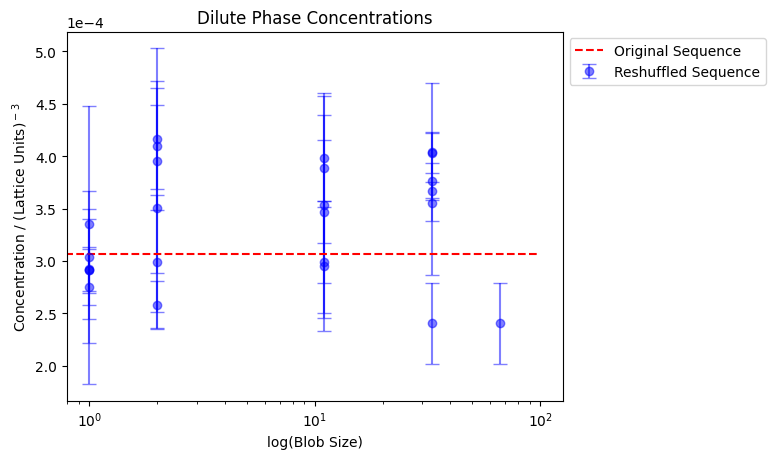

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}


for k in chunks:
    dil_vol_frac_k = dil_averages_lin_2[k]
    dil_vol_frac_std_k = dil_std_dev_lin_2[k]

    for j in shuff:
        dil_vol_frac_j = dil_vol_frac_k[j]
        dil_vol_frac_std_j = dil_vol_frac_std_k[j]
        color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
        colors[j] = color
        marker_color = color
        marker_alpha = 0.5
        j_number = int(j.split('_')[1])
        label = 'Reshuffled Sequence' if k == '1' and j == 'reshuffle_1' else None
        plt.errorbar(int(k), dil_vol_frac_j, yerr=dil_vol_frac_std_j, marker='o',linestyle='None', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha, label = label)

print(colors)
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
marker_color = color
plt.errorbar(66, dil_vol_frac_66_av_2, yerr = dil_vol_frac_66_std_2, marker='o', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha)
#plt.errorbar(0, dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='black', ecolor='black', capsize=5, alpha=marker_alpha)
plt.hlines(dil_vol_frac_OG_av_2, xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')

#plt.plot([], [], marker='x', linestyle='None', color='black', label=f'Original Sequence')


plt.xscale('log')
plt.xlabel('log(Blob Size)')
#plt.xlim(0.8, 100)
plt.ylabel(f'Concentration / (Lattice Units){label_3}')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'Dilute Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('dilute_phase_diagram_blob_NEW.png')
plt.show()

In [ ]:
##DENSE

<ipython-input-18-e0392e019dba>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))


{'reshuffle_1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'reshuffle_2': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'reshuffle_3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'reshuffle_4': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'reshuffle_5': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'reshuffle_6': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)}


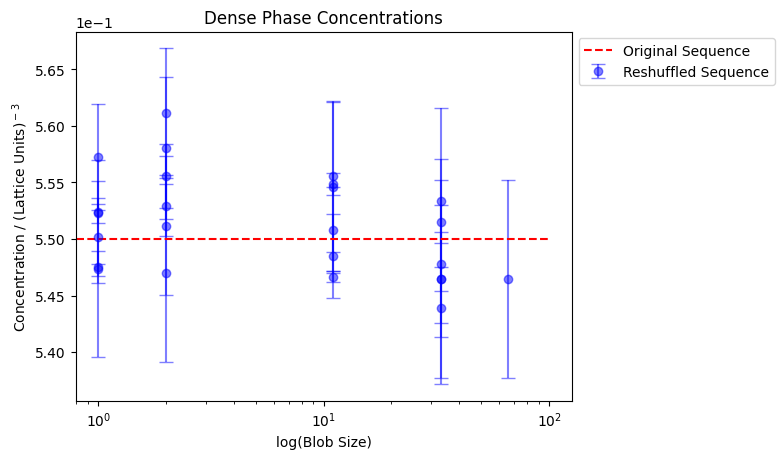

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}


for k in chunks:
    den_vol_frac_k = den_averages_lin_2[k]
    den_vol_frac_std_k = den_std_dev_lin_2[k]

    for j in shuff:
        den_vol_frac_j = den_vol_frac_k[j]
        den_vol_frac_std_j = den_vol_frac_std_k[j]
        color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
        colors[j] = color
        marker_color = color
        marker_alpha = 0.5
        j_number = int(j.split('_')[1])
        label = 'Reshuffled Sequence' if k == '1' and j == 'reshuffle_1' else None
        plt.errorbar(int(k), den_vol_frac_j, yerr=den_vol_frac_std_j, marker='o',linestyle='None', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha, label = label)

print(colors)
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
marker_color = color
plt.errorbar(66, den_vol_frac_66_av_2, yerr = den_vol_frac_66_std_2, marker='o', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha)
#plt.errorbar(0, dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='black', ecolor='black', capsize=5, alpha=marker_alpha)
plt.hlines(den_vol_frac_OG_av_2, xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')

#plt.plot([], [], marker='x', linestyle='None', color='black', label=f'Original Sequence')


plt.xscale('log')
plt.xlabel('log(Blob Size)')
#plt.xlim(0.8, 100)
plt.ylabel(f'Concentration / (Lattice Units){label_3}')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'Dense Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('dense_phase_diagram_blob_linear_NEW.png')
plt.show()

<ipython-input-32-adca1989ad8e>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))


{'reshuffle_1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'reshuffle_2': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'reshuffle_3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'reshuffle_4': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'reshuffle_5': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'reshuffle_6': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)}


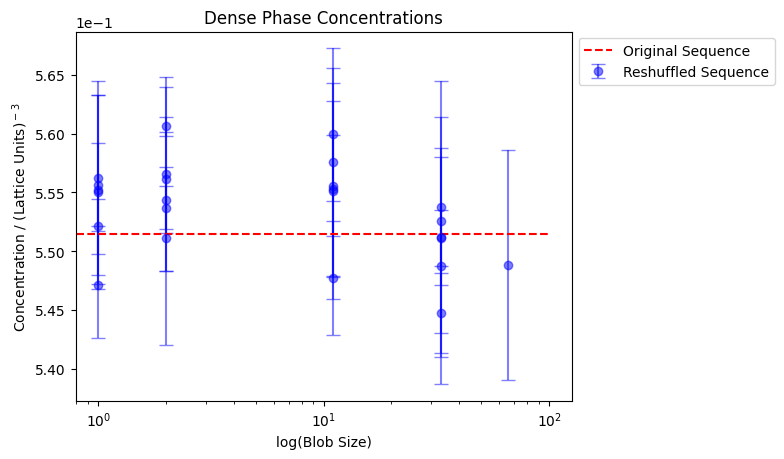

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}


for k in chunks:
    den_vol_frac_k = den_averages[k]
    den_vol_frac_std_k = den_std_dev[k]

    for j in shuff:
        den_vol_frac_j = den_vol_frac_k[j]
        den_vol_frac_std_j = den_vol_frac_std_k[j]
        color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
        colors[j] = color
        marker_color = color
        marker_alpha = 0.5
        j_number = int(j.split('_')[1])
        label = 'Reshuffled Sequence' if k == '1' and j == 'reshuffle_1' else None
        plt.errorbar(int(k), den_vol_frac_j, yerr=den_vol_frac_std_j, marker='o',linestyle='None', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha, label = label)

print(colors)
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
marker_color = color
plt.errorbar(66, den_averages_66, yerr = den_std_dev_66_z, marker='o', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha)
#plt.errorbar(0, dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='black', ecolor='black', capsize=5, alpha=marker_alpha)
plt.hlines(den_averages_OG, xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')

#plt.plot([], [], marker='x', linestyle='None', color='black', label=f'Original Sequence')


plt.xscale('log')
plt.xlabel('log(Blob Size)')
#plt.xlim(0.8, 100)
plt.ylabel(f'Concentration / (Lattice Units){label_3}')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'Dense Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('dense_phase_diagram_blob_log_NEW.png')
plt.show()

In [ ]:
##PATTERNING
patterning_parameter_dict = {'OG': {'1': 0.4035613276761683}, '66': {'1': 0.4035613276761679}, '33': {'1': 0.41368661045998234, '2': 0.40356132767616815, '3': 0.4035613276761679, '4': 0.4035613276761681, '5': 0.4136866104599823, '6': 0.37152552311037823}, '11': {'1': 0.3824807840013662, '2': 0.39808369723067405, '3': 0.4221105506550163, '4': 0.49041482307132983, '5': 0.44319109432981857, '6': 0.42464187135097026}, '2': {'1': 0.45078505641767913, '2': 0.5169729971916256, '3': 0.47692824148438867, '4': 0.4453074259721848, '5': 0.5304595787785673, '6': 0.4166329202095229}, '1': {'1': 0.532575910420934, '2': 0.6071877913899144, '3': 0.4958924535168234, '4': 0.5013700839623181, '5': 0.5009550949087309, '6': 0.4453074259721853}}

In [ ]:
##DILUTE

<ipython-input-22-b93c59bc8bfc>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))


{'reshuffle_1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'reshuffle_2': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'reshuffle_3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'reshuffle_4': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'reshuffle_5': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'reshuffle_6': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)}


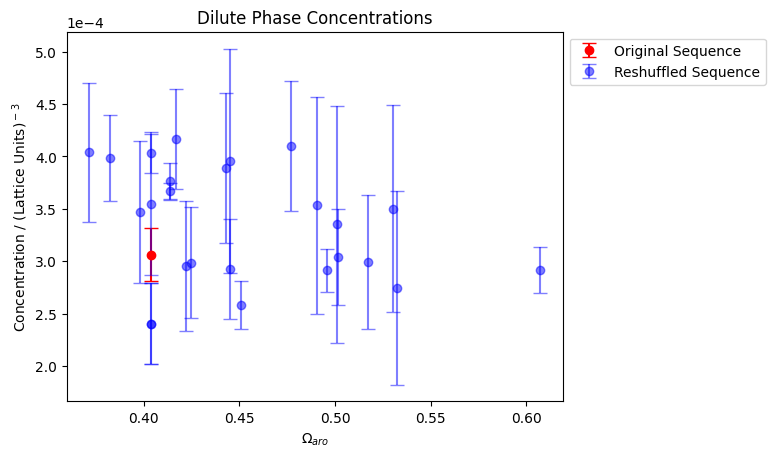

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}
plt.errorbar(patterning_parameter_dict['OG']['1'], dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='red', ecolor='red', capsize=5, label = 'Original Sequence',linestyle='None')

for k in chunks:
    dil_vol_frac_k = dil_averages_lin_2[k]
    dil_vol_frac_std_k = dil_std_dev_lin_2[k]
    x = str(k)
    for j in shuff:
        dil_vol_frac_j = dil_vol_frac_k[j]
        dil_vol_frac_std_j = dil_vol_frac_std_k[j]
        color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
        colors[j] = color
        marker_color = color
        marker_alpha = 0.5
        j_label = j.replace('reshuffle_', '')
        label = 'Reshuffled Sequence' if k == '1' and j == 'reshuffle_1' else None
        plt.errorbar(patterning_parameter_dict[x][j_label], dil_vol_frac_j, yerr=dil_vol_frac_std_j, marker='o',linestyle='None', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha, label = label)

print(colors)
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
marker_color = color
plt.errorbar(patterning_parameter_dict['66']['1'], dil_vol_frac_66_av_2, yerr = dil_vol_frac_66_std_2, marker='o', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha)
#plt.errorbar(0, dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='black', ecolor='black', capsize=5, alpha=marker_alpha)
#plt.hlines(dil_vol_frac_OG_av_2, xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')

#plt.plot([], [], marker='x', linestyle='None', color='black', label=f'Original Sequence')


#plt.xscale('log')
plt.xlabel(r'$\Omega_{aro}$')
#plt.xlim(0.8, 100)
plt.ylabel(f'Concentration / (Lattice Units){label_3}')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'Dilute Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('dilute_phase_diagram_pattern_NEW.png')
plt.show()

In [ ]:
new_chunks = ['OG', '1', '2', '11', '33', '66']
new_dil = {}
for k in chunks:
    new_dil[k] = {}
    dil_vol_frac_k = dil_averages_lin_2[k]
    for j in shuff:
      dil_vol_frac_j = dil_vol_frac_k[j]
      new_dil[k][j] =  dil_vol_frac_j

new_dil['66'] = {}
new_dil['OG'] = {}
new_dil['66']['reshuffle_1'] = dil_vol_frac_66_av_2
new_dil['OG']['reshuffle_1'] = dil_vol_frac_OG_av_2

list_conc = []
list_param = []
for k in chunks:
    for j in shuff:
      j_re = j.replace('reshuffle_', '')
      param =  patterning_parameter_dict[k][j_re]
      dil_vol_frac_k = new_dil[k][j]
      list_conc.append(dil_vol_frac_k)
      list_param.append(param)

X = np.array(list_param)
Y = np.array(list_conc)
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Step 2: Compute covariance
covariance = np.cov(X, Y)[0, 1]

# Step 3: Compute standard deviations
std_dev_X = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_dev_Y = np.std(Y, ddof=1)

# Step 4: Calculate Pearson's correlation coefficient
correlation_coefficient = covariance / (std_dev_X * std_dev_Y)

print("Pearson's correlation coefficient:", correlation_coefficient)

spearman_coefficient, _ = spearmanr(X, Y)

print("Spearman's rank correlation coefficient:", spearman_coefficient)

Pearson's correlation coefficient: -0.39725940218116695
Spearman's rank correlation coefficient: -0.4321739130434783


<ipython-input-23-084da8fc9578>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))


{'reshuffle_1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'reshuffle_2': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'reshuffle_3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'reshuffle_4': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'reshuffle_5': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'reshuffle_6': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)}


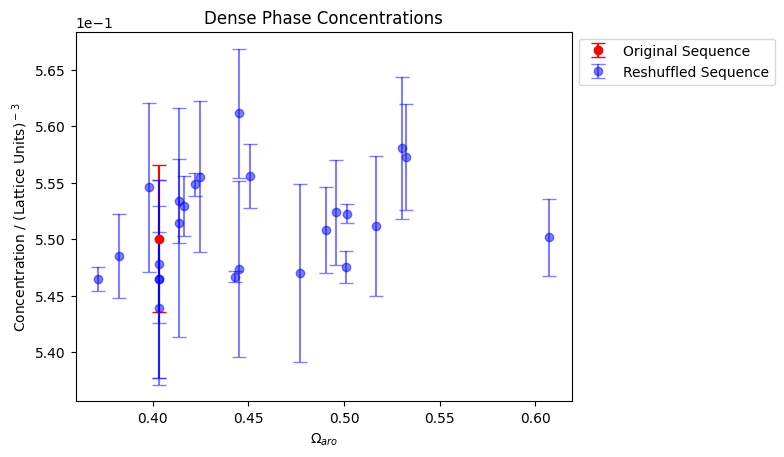

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}
plt.errorbar(patterning_parameter_dict['OG']['1'], den_vol_frac_OG_av_2, yerr = den_vol_frac_OG_std_2, marker='o', color='red', ecolor='red', capsize=5, label = 'Original Sequence',linestyle='None')

for k in chunks:
    den_vol_frac_k = den_averages_lin_2[k]
    den_vol_frac_std_k = den_std_dev_lin_2[k]
    x = str(k)
    for j in shuff:
        den_vol_frac_j = den_vol_frac_k[j]
        den_vol_frac_std_j = den_vol_frac_std_k[j]
        color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
        colors[j] = color
        marker_color = color
        marker_alpha = 0.5
        j_label = j.replace('reshuffle_', '')
        label = 'Reshuffled Sequence' if k == '1' and j == 'reshuffle_1' else None
        plt.errorbar(patterning_parameter_dict[x][j_label], den_vol_frac_j, yerr=den_vol_frac_std_j, marker='o',linestyle='None', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha, label = label)

print(colors)
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
marker_color = color
plt.errorbar(patterning_parameter_dict['66']['1'], den_vol_frac_66_av_2, yerr = den_vol_frac_66_std_2, marker='o', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha)
#plt.errorbar(0, dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='black', ecolor='black', capsize=5, alpha=marker_alpha)
#plt.hlines(dil_vol_frac_OG_av_2, xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')

#plt.plot([], [], marker='x', linestyle='None', color='black', label=f'Original Sequence')


#plt.xscale('log')
plt.xlabel(r'$\Omega_{aro}$')
#plt.xlim(0.8, 100)
plt.ylabel(f'Concentration / (Lattice Units){label_3}')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'Dense Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('dense_phase_diagram_linear_pattern_NEW.png')
plt.show()

In [ ]:
new_chunks = ['OG', '1', '2', '11', '33', '66']
new_dil = {}
for k in chunks:
    new_dil[k] = {}
    dil_vol_frac_k = den_averages_lin_2[k]
    for j in shuff:
      dil_vol_frac_j = dil_vol_frac_k[j]
      new_dil[k][j] =  dil_vol_frac_j

new_dil['66'] = {}
new_dil['OG'] = {}
new_dil['66']['reshuffle_1'] = den_vol_frac_66_av_2
new_dil['OG']['reshuffle_1'] = den_vol_frac_OG_av_2

list_conc = []
list_param = []
for k in chunks:
    for j in shuff:
      j_re = j.replace('reshuffle_', '')
      param =  patterning_parameter_dict[k][j_re]
      dil_vol_frac_k = new_dil[k][j]
      list_conc.append(dil_vol_frac_k)
      list_param.append(param)

X = np.array(list_param)
Y = np.array(list_conc)
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Step 2: Compute covariance
covariance = np.cov(X, Y)[0, 1]

# Step 3: Compute standard deviations
std_dev_X = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_dev_Y = np.std(Y, ddof=1)

# Step 4: Calculate Pearson's correlation coefficient
correlation_coefficient = covariance / (std_dev_X * std_dev_Y)

print("Pearson's correlation coefficient:", correlation_coefficient)

spearman_coefficient, _ = spearmanr(X, Y)

print("Spearman's rank correlation coefficient:", spearman_coefficient)

Pearson's correlation coefficient: 0.24194182364674466
Spearman's rank correlation coefficient: 0.32434782608695645


<ipython-input-35-18026291440e>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))


{'reshuffle_1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'reshuffle_2': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'reshuffle_3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'reshuffle_4': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 'reshuffle_5': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 'reshuffle_6': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)}


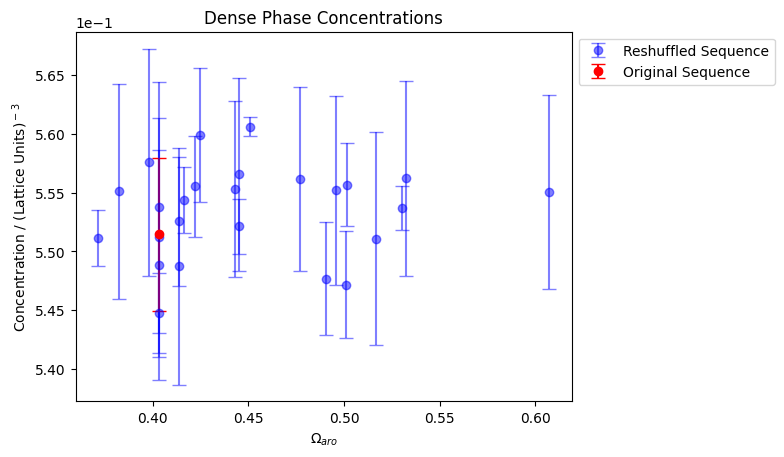

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}
#plt.errorbar(patterning_parameter_dict['OG']['1'], den_averages_OG, yerr = den_vol_frac_OG_std_2, marker='o', color='red', ecolor='red', capsize=5, label = 'Original Sequence',linestyle='None')

for k in chunks:
    den_vol_frac_k = den_averages[k]
    den_vol_frac_std_k = den_std_dev[k]
    x = str(k)
    for j in shuff:
        den_vol_frac_j = den_vol_frac_k[j]
        den_vol_frac_std_j = den_vol_frac_std_k[j]
        color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
        colors[j] = color
        marker_color = color
        marker_alpha = 0.5
        j_label = j.replace('reshuffle_', '')
        label = 'Reshuffled Sequence' if k == '1' and j == 'reshuffle_1' else None
        plt.errorbar(patterning_parameter_dict[x][j_label], den_vol_frac_j, yerr=den_vol_frac_std_j, marker='o',linestyle='None', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha, label = label)

print(colors)
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
marker_color = color
plt.errorbar(patterning_parameter_dict['OG']['1'], den_averages_OG, yerr = den_vol_frac_OG_std_2, marker='o', color='red', ecolor='red', capsize=5, label = 'Original Sequence',linestyle='None')
plt.errorbar(patterning_parameter_dict['66']['1'], den_averages_66, yerr = den_std_dev_66_z, marker='o', color='blue', ecolor='blue', capsize=5, alpha=marker_alpha)
#plt.errorbar(0, dil_vol_frac_OG_av_2, yerr = dil_vol_frac_OG_std_2, marker='o', color='black', ecolor='black', capsize=5, alpha=marker_alpha)
#plt.hlines(dil_vol_frac_OG_av_2, xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')

#plt.plot([], [], marker='x', linestyle='None', color='black', label=f'Original Sequence')


#plt.xscale('log')
plt.xlabel(r'$\Omega_{aro}$')
#plt.xlim(0.8, 100)
plt.ylabel(f'Concentration / (Lattice Units){label_3}')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'Dense Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('dense_phase_diagram_log_pattern_NEW.png')
plt.show()

In [ ]:
new_chunks = ['OG', '1', '2', '11', '33', '66']
new_dil = {}
for k in chunks:
    new_dil[k] = {}
    dil_vol_frac_k = den_averages[k]
    for j in shuff:
      dil_vol_frac_j = dil_vol_frac_k[j]
      new_dil[k][j] =  dil_vol_frac_j

new_dil['66'] = {}
new_dil['OG'] = {}
new_dil['66']['reshuffle_1'] = den_averages_66
new_dil['OG']['reshuffle_1'] = den_averages_OG

list_conc = []
list_param = []
for k in chunks:
    for j in shuff:
      j_re = j.replace('reshuffle_', '')
      param =  patterning_parameter_dict[k][j_re]
      dil_vol_frac_k = new_dil[k][j]
      list_conc.append(dil_vol_frac_k)
      list_param.append(param)

X = np.array(list_param)
Y = np.array(list_conc)
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Step 2: Compute covariance
covariance = np.cov(X, Y)[0, 1]

# Step 3: Compute standard deviations
std_dev_X = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_dev_Y = np.std(Y, ddof=1)

# Step 4: Calculate Pearson's correlation coefficient
correlation_coefficient = covariance / (std_dev_X * std_dev_Y)

print("Pearson's correlation coefficient:", correlation_coefficient)
spearman_coefficient, _ = spearmanr(X, Y)

print("Spearman's rank correlation coefficient:", spearman_coefficient)

Pearson's correlation coefficient: 0.06330290921540978
Spearman's rank correlation coefficient: 0.11043478260869564


In [ ]:
##END